In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import tree , metrics
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold,LeaveOneOut #Iteradores de C-V

from sklearn.linear_model import LogisticRegression
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Participantes: <br>
* Camilo Campaz Jiménez
* Johan Stiven Ricardo
* Maria Guzman
<br>
En primer lugar se importarán las librerias a utilizar al igual que el dataset que contiene la información

In [164]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [165]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [166]:

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Se hace una observación general de los datos como conjunto, sin separar por variables.

Text(0.5, 0, 'Ages')

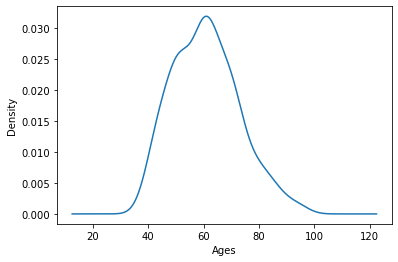

In [167]:
ax = df['age'].plot.kde()
ax.set_xlabel('Ages')

Ahora se hace un analisis de distribución de la edad sobre todo el dataset, se observa que no es normal

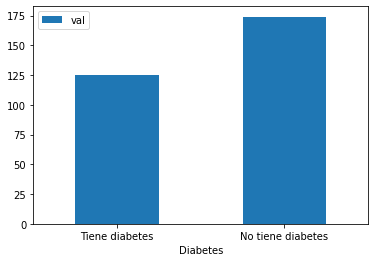

In [168]:

a = pd.array(df['diabetes'])
#df.count()
c = 0
d = 0
for b in a:
    if b == 1:
        c = c+1
        
for b in a:
    if b == 0:
        d = d+1

pf = pd.DataFrame({'Diabetes':['Tiene diabetes', 'No tiene diabetes'], 'val':[c, d]})

ax = pf.plot.bar(x='Diabetes', y='val', rot=0)


Ahora se hace un diagrama de barras para observar de una de las variables dicotomicas o booleanas que proporción hay en el total de datos y se observa que en este dataset hay mas personas sin diabetes que con diabetes
Es importante tener esto claro ya que cuando llegue el momento de preparar un modelo para hacer predicciones con esta información podemos tener un punto de referencia a la hora de probar que tan correcto es el modelo.

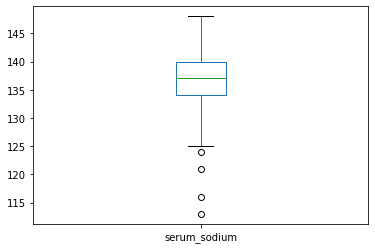

In [169]:

ax = df['serum_sodium'].plot.box()

Mediante un diagrama de caja se evalua la variable serum_sodium para observar como se comporta, es evidente que contiene 4 datos atipicos que por el momento no retiraremos ya que esta primera parte es solo exploración de los datos

In [170]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [171]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

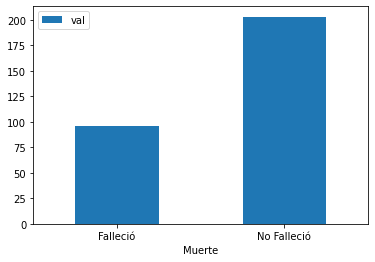

In [172]:
a = pd.array(df['DEATH_EVENT'])
#df.count()
c = 0
d = 0
for b in a:
    if b == 1:
        c = c+1
        
for b in a:
    if b == 0:
        d = d+1

pf = pd.DataFrame({'Muerte':['Falleció', 'No Falleció'], 'val':[c, d]})

ax = pf.plot.bar(x='Muerte', y='val', rot=0)

En este caso observamos la variable que en su momento querremos predecir, que es la que representa si la persona fallece o no ya dependiendo de muchos factores que en su momento serán analizados

In [173]:
df.isna().sum().sort_values()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Como se evidencia ninguna variable posee datos faltantes, importante a la hora de elegir la variable ideal para entrenar los modelos

In [174]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


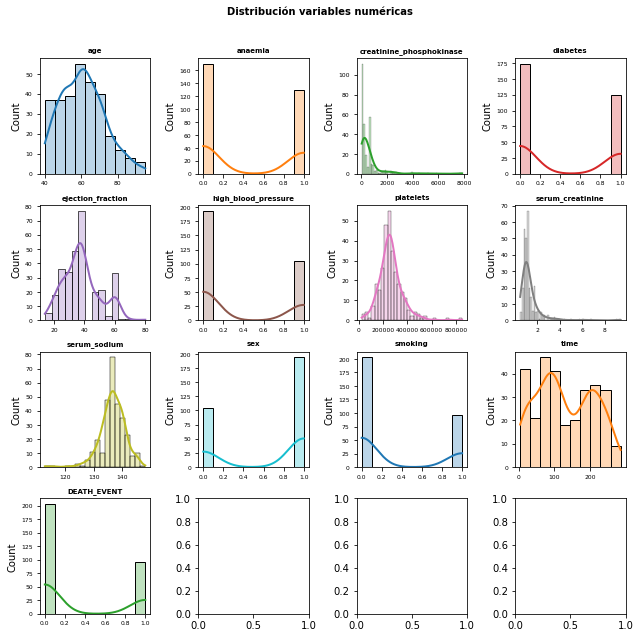

In [175]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 9))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
#columnas_numeric = columnas_numeric.drop('precio')
print(columnas_numeric)
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


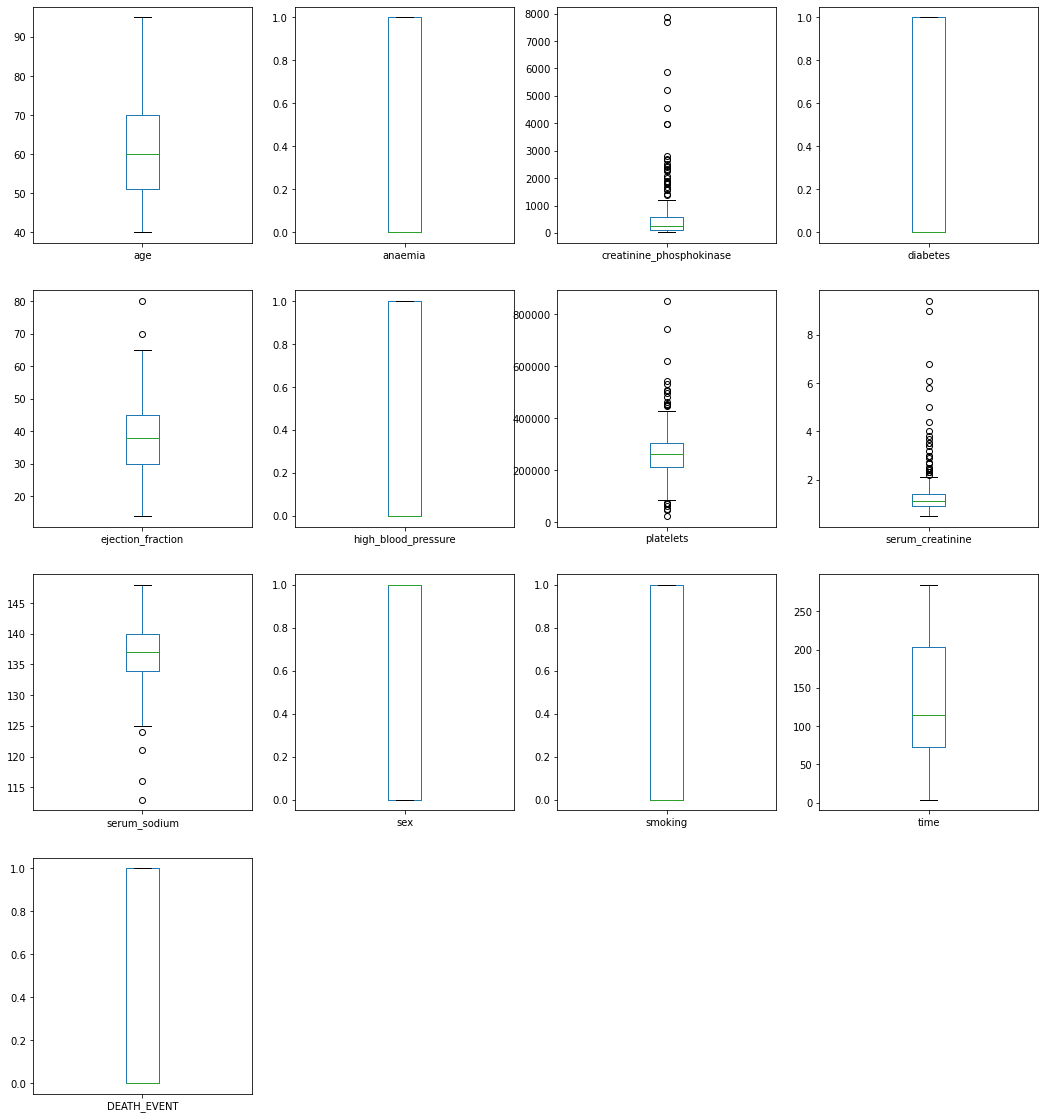

In [176]:
cols = df.columns
print(cols)
i=1
plt.figure(figsize=(18,20))
for col in cols:
    plt.subplot(4,4,i)
    df[cols[i-1]].plot.box()
    #sns.boxplot(x='target',y=col,data=df)
    i += 1 


Se observa que dejando de lado las variables dicotomicas, creatinine_phosphokinase, platelets y serum_creatinine son variables con demasiada varianza como para hacer un remplazo de datos en el dataset por lo que de momento no serán utilizadas.

Index(['ejection_fraction', 'serum_sodium'], dtype='object')


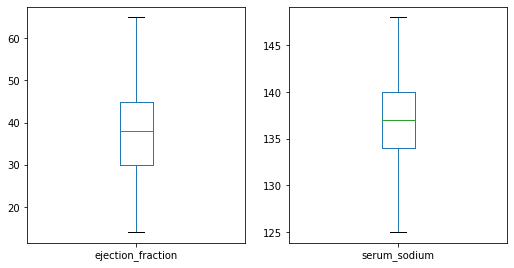

In [177]:
ds = df.copy()
wrkColumns = df.columns.drop(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'high_blood_pressure', 'platelets',
       'serum_creatinine', 'sex', 'smoking', 'time',
       'DEATH_EVENT'])
print(wrkColumns)

for column in wrkColumns:
       Q1 = df[column].quantile(0.25)
       Q3 = df[column].quantile(0.75)
       IQR = Q3 - Q1
       Lower_Fence = Q1 - (1.5 * IQR)
       Upper_Fence = Q3 + (1.5 * IQR)
       for row in df[column]:
              #print(row)
              if(row > Upper_Fence) or (row < Lower_Fence): 
                     #print(Upper_Fence, row, Lower_Fence, df[column].mean())
                     df[column] = df[column].replace(row, df[column].mean())
                     
#print(df['ejection_fraction'])
cols = wrkColumns
#print(cols)
i=1
plt.figure(figsize=(18,20))
for col in cols:
    plt.subplot(4,4,i)
    df[cols[i-1]].plot.box()
    #sns.boxplot(x='target',y=col,data=df)
    i += 1 
#df['ejection_fraction'].plot.box()
#df['serum_sodium'].plot.box()


En este caso ya se retiran los datos atipicos de las variables presentadas anteriormente

In [178]:
print('Correlación Pearson para ejection_fraction: ', df['DEATH_EVENT'].corr(df['ejection_fraction'], method='pearson'))
print('Correlación Pearson para serum_sodium: ', df['DEATH_EVENT'].corr(df['serum_sodium'], method='pearson'))
print('Correlación Pearson para time: ', df['DEATH_EVENT'].corr(df['time'], method='pearson'))


Correlación Pearson para ejection_fraction:  -0.28328467273550384
Correlación Pearson para serum_sodium:  -0.17626891731211647
Correlación Pearson para time:  -0.5269637792775769


In [179]:
Feature_Cols = ['serum_sodium', 'ejection_fraction', 'time']
X = df[Feature_Cols]
y = df['DEATH_EVENT']
#print(df.label)
#kf = sk.KFold(n_splits=2)
#kf.get_n_splits(X)

#print(kf)
#import sklearn.model_selection as skc
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train, y_train)

     serum_sodium  ejection_fraction  time
258         135.0               25.0   230
37          145.0               50.0    30
97          136.0               60.0    85
191         135.0               60.0   174
135         137.0               40.0   107
..            ...                ...   ...
251         143.0               35.0   215
192         130.0               40.0   175
117         138.0               60.0    94
47          138.0               38.0    40
172         145.0               60.0   146

[224 rows x 3 columns] 258    0
37     1
97     0
191    0
135    0
      ..
251    0
192    0
117    0
47     1
172    0
Name: DEATH_EVENT, Length: 224, dtype: int64


In [180]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.predict(X_test)
#print(.reshape(-1, 1))
y_pred=logisticRegr.predict(X_test)

In [181]:
cnf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[46,  2],
       [14, 13]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

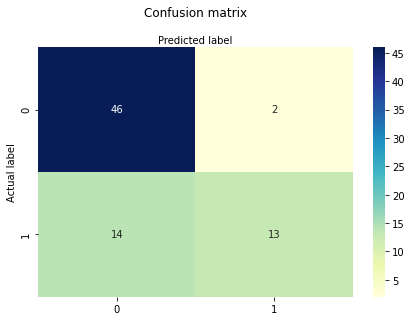

In [182]:
class_names=['Positivo','Negativo'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [183]:
print("Accuracy:",sk.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sk.metrics.precision_score(y_test, y_pred))
print("Recall:",sk.metrics.recall_score(y_test, y_pred))

Accuracy: 0.7866666666666666
Precision: 0.8666666666666667
Recall: 0.48148148148148145


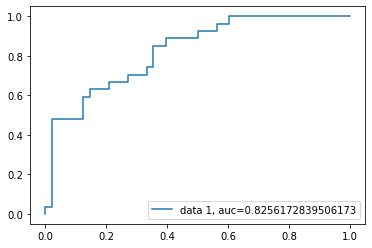

In [184]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = sk.metrics.roc_curve(y_test,  y_pred_proba)
auc = sk.metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## Segundo Modelo: Decision Tree 

### Descripcion de los datos

In [185]:
df.describe(include="all")


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,37.836211,0.351171,263358.029264,1.39388,136.869084,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.431880,0.478136,97804.236869,1.03451,3.841323,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,65.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Base Line

In [186]:
deceased_df = df[df['DEATH_EVENT'] == 1]
not_deceased_df = df[df['DEATH_EVENT'] == 0]



In [187]:
deceased_df.shape[0]

96

In [188]:
not_deceased_df.shape[0]

203

In [189]:
df.shape[0]

299

In [190]:
print("Base line para deceased: ", float(deceased_df.shape[0]) / df.shape[0])
print("Base line para not deceased: ", float(not_deceased_df.shape[0]) / df.shape[0])

Base line para deceased:  0.3210702341137124
Base line para not deceased:  0.6789297658862876


In [191]:
df.DEATH_EVENT.describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

### Implementacion del modelo

In [192]:
#creamos nuestro objeto  ctree
#vamos a usar los valores por defecto del arbol de decision
ctree = tree.DecisionTreeClassifier(
    max_depth=5,      
    min_samples_split=2, 
    min_samples_leaf=1,  
    random_state=None,    
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None
)


<center> Ahora entrenamos nuestro arbol</center>

In [193]:
Y = df['DEATH_EVENT'] #variable objetivo
X = df.drop(['DEATH_EVENT'], axis=1) #variables independientes
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

<p> Valores tomados para en entrenamiento</p>

In [194]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
258,45.0,1,66,1,25.0,0,233000.00,0.80,135.0,1,0,230
37,82.0,1,855,1,50.0,1,321000.00,1.00,145.0,0,0,30
97,70.0,1,59,0,60.0,0,255000.00,1.10,136.0,0,0,85
191,64.0,1,62,0,60.0,0,309000.00,1.50,135.0,0,0,174
135,75.0,0,582,0,40.0,0,263358.03,1.18,137.0,1,0,107


In [195]:
y_train.head()

258    0
37     1
97     0
191    0
135    0
Name: DEATH_EVENT, dtype: int64

In [196]:
ctree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

<p> <b> Ahora observamos la importancia de los atributos independientes para la clasificacion</b> </p>

In [197]:
ctree.feature_importances_

array([0.07743832, 0.        , 0.04116388, 0.        , 0.09442723,
       0.        , 0.04376286, 0.06555797, 0.03646905, 0.03065903,
       0.        , 0.61052166])

In [198]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

<b> Estas son las variables ordenadas por importancia <b>

In [199]:
X.columns[np.argsort(-ctree.feature_importances_)]

Index(['time', 'ejection_fraction', 'age', 'serum_creatinine', 'platelets',
       'creatinine_phosphokinase', 'serum_sodium', 'sex', 'anaemia',
       'diabetes', 'high_blood_pressure', 'smoking'],
      dtype='object')

<P>Visualizacion del arbol</p>

In [200]:

from sklearn.tree import export_graphviz


In [201]:
fn = df.drop(['DEATH_EVENT'], axis=1)
cn = ["Death", "No Death"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=800, sharey=True, squeeze=True)

tree.plot_tree(ctree,feature_names=fn.columns,class_names=cn,filled=True,label='all',
              impurity=True, node_ids=False,
              proportion=False, rotate='deprecated', rounded=False,
              precision=3, ax=None, fontsize=None)

fig.savefig('tree.jpg')



<p> Estas son las predicciones que hace nuestro modelo con los datos de entrenamiento</p> <br>

<p> Por ahora se cuenta cuantos clasificó, mientras se logra arreglar el grafico </p>

In [202]:
results = ctree.predict(x_train)
deceased = 0
not_deceased = 0
for result in results:
    if result == 1:
        deceased += 1
    else:
        not_deceased += 1    

print("Deceased:", deceased)
print("Not deceased:", not_deceased)

Deceased: 60
Not deceased: 164


### Evaluacion del modelo

Ya tenemos el modelo "aprendido" con el dataset.
Vamos ahora a evaluarlo sobre ese mismo dataset para poder ver los éxitos y errores de la predicción. 

In [203]:
y_pred = ctree.predict(x_test)

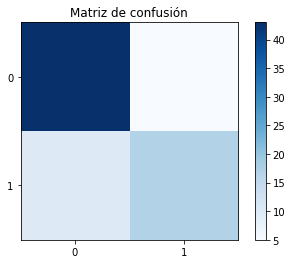

In [204]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())
plt.show()

In [205]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
#print("Precisión     : ", metrics.precision_score(y_test, y_pred, "DEATH_EVENT", average='macro'))
#print("Recall        : ", metrics.recall_score(y_test, y_pred, "DEATH_EVENT", average='macro'))
#print("F1-score      : ", metrics.f1_score(y_test, y_pred, "DEATH_EVENT", average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])

specificity = VN/(VN+FP)
print("Especificidad : ", specificity)


[[43  5]
 [10 17]]
Exactitud:  0.8
Kappa    :  0.5476477683956573
Especificidad :  0.7727272727272727


<P> Cuando el base line es del 32%, obtenenos una exactitud del 74%</p>

Naive Bayes model

In [206]:
Vi = df[df.DEATH_EVENT == 0]
Mu = df[df.DEATH_EVENT == 1]

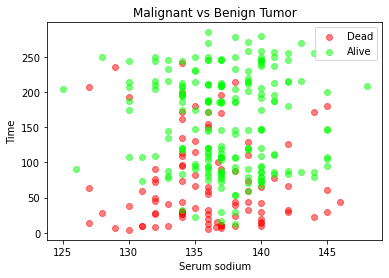

In [207]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Serum sodium")
plt.ylabel("Time")
plt.scatter(Mu.serum_sodium, Mu.time, color = "red", label = "Dead", alpha = 0.5)
plt.scatter(Vi.serum_sodium, Vi.time, color = "lime", label = "Alive", alpha = 0.5)
plt.legend()
plt.show()

In [208]:
X_train, X_test, y_train, y_test = train_test_split(df[Feature_Cols], df.DEATH_EVENT, test_size=0.3,random_state=109)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


In [209]:
from sklearn.cluster import KMeans as KMeans

#X['anaemia'] = list(map(lambda x: x.replace('True', 1), X['anaemia']))
#X['anaemia'] = list(map(lambda x: x.replace('False', 0), X['anaemia']))
#print(X['anemia'])
#print(X['anaemia'])
X = df[Feature_Cols]
print(X)
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=400, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(principalDf)


     serum_sodium  ejection_fraction  time
0      130.000000               20.0     4
1      136.000000               38.0     6
2      129.000000               20.0     7
3      137.000000               20.0     7
4      136.625418               20.0     8
..            ...                ...   ...
294    143.000000               38.0   270
295    139.000000               38.0   271
296    138.000000               60.0   278
297    140.000000               38.0   280
298    136.000000               45.0   285

[299 rows x 3 columns]


In [213]:
#y_km= np.where(y_km == "False", 0, y_km)
#y_km= list(map(lambda x: x.replace('False', 0), y_km))

y_km = pd.DataFrame(y_km, columns=['DEATH_EVENT'])
#print(y_km)

y_km = y_km.replace("False", 0)
y_km = y_km.replace("True", 1)

#y_km = y_km.to_numpy()
print(y_km)

     DEATH_EVENT
0              1
1              1
2              1
3              1
4              1
..           ...
294            0
295            0
296            0
297            0
298            0

[299 rows x 1 columns]


In [214]:

principalDf = StandardScaler().fit_transform(principalDf)
#print(principalDf)
#principalDf.head()

In [215]:
print(principalDf[:,1])

[ 7.03115103e-01  1.47594639e+00  6.14420700e-01  1.03101950e+00
  9.99306683e-01  1.29710009e+00  8.59734606e-01  1.75927357e+00
  2.25846286e+00  1.19009657e+00  1.16674607e+00  1.28528984e+00
  1.25152411e+00  1.46698865e+00  1.29139244e+00  1.71369759e+00
  1.58659365e+00  2.63226969e-01  1.22425725e+00  1.86011064e+00
  1.05582618e+00  1.08959060e+00  1.43255534e+00  1.82109476e+00
  9.48821349e-01  1.68503439e+00  1.41424491e+00  1.42034752e+00
  1.12766634e+00  8.08052097e-01  1.11545982e+00  1.18763508e+00
  7.10005003e-01  1.08388164e+00  1.72669270e+00  9.98041067e-01
  1.40203709e+00  1.97486044e+00  1.01960028e+00  1.49543907e+00
  5.81838528e-01  9.43112391e-01  1.49112644e+00  1.36541754e+00
  2.05134701e+00  1.06988253e+00  4.22758846e-01  1.16507449e+00
  4.07698503e-01  1.02934662e+00  7.78325057e-01  6.95734567e-01
  2.19144737e+00  1.23114584e+00  7.91592808e-01  5.15095676e-01
  9.13384045e-01  1.04804939e+00  3.93031807e-01  3.44205737e-01
  6.22889109e-01  6.10286

In [216]:
#C = pca.fit_transform(km.cluster_centers_)
#print(C)

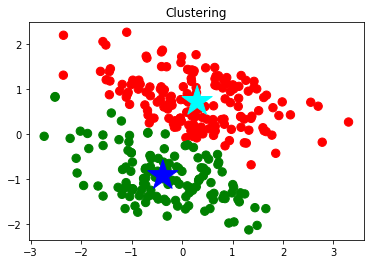

In [220]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Predicting the clusters

#principalDf = StandardScaler().fit_transform(principalDf)

C = km.cluster_centers_
colores=['green','red']
colores2 = ['blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
f1 = principalDf[:,0]
f2 = principalDf[:,1]

plt.title('Clustering')
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores2, s=1000)
plt.show()

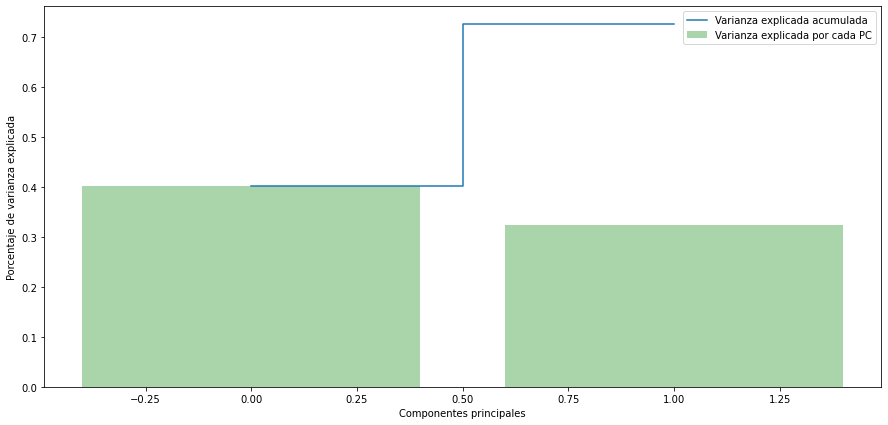

In [221]:
var_exp=pca.explained_variance_ratio_ 
cum_var_exp = np.cumsum(var_exp) 
var_exp

plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()